# Exploratory Data Analysis

## Intoduction to the Dataset
The Consumer Financial Protection Bureau (CFPB) dataset is a comprehensive collection of consumer complaints filed against financial institution.
These complaints cover various financial products and services, ranging from credit reporting to mortgages, and provide valuable insights into
consumer experiences and issues within the financial industry.

In [160]:
# importing the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [18]:
#Importing the complete CFPB dataset
df = pd.read_csv('complaints.csv')

/var/folders/8b/m3gr8w0j5ngds58k4cvfpkl80000gn/T/ipykernel_5611/1388012264.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv')


In [6]:
#checking how the data looks like
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-17,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,On XX/XX/XXXX I visited the Emergency Room at ...,NaN,Nationwide Credit Corporation,MD,21921,NaN,Consent provided,Web,2024-01-23,Closed with explanation,Yes,NaN,8166450
1,2024-02-08,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,XXXX XXXX XXXXXXXX XXXX XXXX debt collection ...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,WI,53218,NaN,Consent provided,Web,2024-02-08,Closed with non-monetary relief,Yes,NaN,8299614
2,2024-02-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,GA,30324,NaN,NaN,Web,2024-02-29,In progress,Yes,NaN,8448740
3,2024-03-22,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NY,XXXXX,NaN,NaN,Web,2024-03-22,In progress,Yes,NaN,8603440
4,2024-03-03,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30087,NaN,Consent not provided,Web,2024-03-03,Closed with non-monetary relief,Yes,NaN,8464681


In [5]:
# Visualising the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5089396 entries, 0 to 5089395
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 698.

In [19]:
#checking the total null values for each column in the df
null_counts = df.isna().sum()
print(null_counts)

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 2
Sub-issue                        734105
Consumer complaint narrative    3297317
Company public response         2655723
Company                               0
State                             45412
ZIP code                          30225
Tags                            4609859
Consumer consent provided?      1017835
Submitted via                         0
Date sent to company                  0
Company response to consumer         11
Timely response?                      0
Consumer disputed?              4321080
Complaint ID                          0
dtype: int64


Several columns contain null values. While some columns may have a substantial number of nulls, we particularly want to ensure that we retain the consumer narrative column as it holds valuable information for our analysis. Let's handle the null values by filtering out the rows where the consumer narrative is null:

In [20]:
df = df[~df['Consumer complaint narrative'].isna()]

In [21]:
# Again checking the total null values for each column in the df
null_counts = df.isna().sum()
print(null_counts)

Date received                         0
Product                               0
Sub-product                       52206
Issue                                 0
Sub-issue                        225171
Consumer complaint narrative          0
Company public response          852027
Company                               0
State                              6493
ZIP code                              0
Tags                            1559714
Consumer consent provided?            0
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              1628068
Complaint ID                          0
dtype: int64


 Similarly, we find that it is important to include Company public response, Sub-issue and Sub-product in the analyses thus droping rows whith null un them as well.

In [22]:
# Dropping rows with null values in Sub-issue, Sub-product, State, Company response to consumer  and Company public response
df = df[~df['Sub-product'].isna()]
df = df[~df['Sub-issue'].isna()]
df = df[~df['Company public response'].isna()]
df = df[~df['State'].isna()]
df = df[~df['Company response to consumer'].isna()]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821436 entries, 1 to 5088188
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 821436 non-null  object
 1   Product                       821436 non-null  object
 2   Sub-product                   821436 non-null  object
 3   Issue                         821436 non-null  object
 4   Sub-issue                     821436 non-null  object
 5   Consumer complaint narrative  821436 non-null  object
 6   Company public response       821436 non-null  object
 7   Company                       821436 non-null  object
 8   State                         821436 non-null  object
 9   ZIP code                      821436 non-null  object
 10  Tags                          93398 non-null   object
 11  Consumer consent provided?    821436 non-null  object
 12  Submitted via                 821436 non-null  object
 13  Dat

Now, we filter the data based on the wether the consumer has provided content. To only include the rows where the consumer has explicitly provided the consent:

In [25]:
# Including only the records where consumer consent is provided
df = df[df['Consumer consent provided?'] == 'Consent provided']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821436 entries, 1 to 5088188
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 821436 non-null  object
 1   Product                       821436 non-null  object
 2   Sub-product                   821436 non-null  object
 3   Issue                         821436 non-null  object
 4   Sub-issue                     821436 non-null  object
 5   Consumer complaint narrative  821436 non-null  object
 6   Company public response       821436 non-null  object
 7   Company                       821436 non-null  object
 8   State                         821436 non-null  object
 9   ZIP code                      821436 non-null  object
 10  Tags                          93398 non-null   object
 11  Consumer consent provided?    821436 non-null  object
 12  Submitted via                 821436 non-null  object
 13  Dat

In [30]:
# Counting the unique values in the Submitted via column
value_counts_sub = df['Submitted via'].value_counts()
print(value_counts_sub)

Submitted via
Web    821436
Name: count, dtype: int64


Since there only a single value throughout the "Submitted via" column, it adds no value and we drop it.

In [31]:
# Dropping the Submitted via column
df.drop(columns=['Submitted via'], inplace=True)

In [32]:
# Counting the unique values in the Tags column
value_counts_tags = df['Tags'].value_counts()
print(value_counts_tags)

Tags
Servicemember                    65008
Older American                   21264
Older American, Servicemember     7126
Name: count, dtype: int64


In [33]:
df = df[~df['Tags'].isna()]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93398 entries, 42 to 5081725
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 93398 non-null  object
 1   Product                       93398 non-null  object
 2   Sub-product                   93398 non-null  object
 3   Issue                         93398 non-null  object
 4   Sub-issue                     93398 non-null  object
 5   Consumer complaint narrative  93398 non-null  object
 6   Company public response       93398 non-null  object
 7   Company                       93398 non-null  object
 8   State                         93398 non-null  object
 9   ZIP code                      93398 non-null  object
 10  Tags                          93398 non-null  object
 11  Consumer consent provided?    93398 non-null  object
 12  Date sent to company          93398 non-null  object
 13  Company response t

In [37]:
df['Date received'].describe()

count          93398
unique          3274
top       2023-01-20
freq             157
Name: Date received, dtype: object

In [42]:
df2 = df.copy()

In [43]:
# Converting the column value types to datetime  
df2['Date received'] = pd.to_datetime(df2['Date received'])

In [45]:
df2['Date received'].head()

42    2023-11-30
57    2024-03-06
215   2024-02-10
362   2024-02-13
466   2024-03-05
Name: Date received, dtype: datetime64[ns]

In [48]:
# Filter from a particular date onwards
desired_date = '2021-01-01'  # Example date
df2 = df2[df2['Date received'] >= desired_date]

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55924 entries, 42 to 5081162
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 55924 non-null  datetime64[ns]
 1   Product                       55924 non-null  object        
 2   Sub-product                   55924 non-null  object        
 3   Issue                         55924 non-null  object        
 4   Sub-issue                     55924 non-null  object        
 5   Consumer complaint narrative  55924 non-null  object        
 6   Company public response       55924 non-null  object        
 7   Company                       55924 non-null  object        
 8   State                         55924 non-null  object        
 9   ZIP code                      55924 non-null  object        
 10  Tags                          55924 non-null  object        
 11  Consumer consent provided?    

Filtering the data for the past 3 years, we get about 56,000 rows to work with.

In [51]:
# Dropping the un-useful columns
df2.drop(columns=['Consumer disputed?'], inplace=True)

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55924 entries, 42 to 5081162
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 55924 non-null  datetime64[ns]
 1   Product                       55924 non-null  object        
 2   Sub-product                   55924 non-null  object        
 3   Issue                         55924 non-null  object        
 4   Sub-issue                     55924 non-null  object        
 5   Consumer complaint narrative  55924 non-null  object        
 6   Company public response       55924 non-null  object        
 7   Company                       55924 non-null  object        
 8   State                         55924 non-null  object        
 9   ZIP code                      55924 non-null  object        
 10  Tags                          55924 non-null  object        
 11  Consumer consent provided?    

Checking the distribution nof the complaints by the different products:

In [55]:
# Calculate value counts for 'Company_clean' and convert to DataFrame
df_value_counts_prod = df2['Product'].value_counts()
df_value_counts_prod

Product
Credit reporting, credit repair services, or other personal consumer reports    25378
Checking or savings account                                                      7146
Credit reporting or other personal consumer reports                              6594
Debt collection                                                                  5692
Credit card or prepaid card                                                      5645
Credit card                                                                      1846
Vehicle loan or lease                                                            1655
Mortgage                                                                         1385
Student loan                                                                      485
Prepaid card                                                                       65
Payday loan, title loan, or personal loan                                          28
Payday loan, title loan, personal loan, or adv

We can bin the products such as "student loan", "Payday loan, title loan, or personal loan"
"Payday loan, title loan, personal loan, or advance loan" and "Vehicle loan or lease" into a single category -> Loan a well as we can bin 
and then bin the "Credit reporting or other personal consumer reports" along with "Credit reporting, credit repair services, or other personal consumer reports" -> Credit Reporting
and then "Credit card", "Prepaid card" and then "Credit card or prepaid card" -> "Credit cards and Prepaid cards"



In [59]:
# Creating a dictionary to map similar values to their bins
product_bins = {
    "Credit reporting, credit repair services, or other personal consumer reports": "Credit reporting",
    "Credit reporting or other personal consumer reports": "Credit reporting",
    "Checking or savings account": "Checking or savings account",
    "Debt collection": "Debt collection",
    "Credit card or prepaid card": "Credit card or prepaid card",
    "Credit card": "Credit card or prepaid card",
    "Vehicle loan or lease": "Loan",
    "Mortgage": "Mortgage",
    "Student loan": "Loan",
    "Prepaid card": "Credit card or prepaid card",
    "Payday loan, title loan, or personal loan": "Loan",
    "Payday loan, title loan, personal loan, or advance loan": "Loan"
}

# Bin the values in the 'Product' column using the defined dictionary
df2['Product'] = df2['Product'].replace(product_bins)

df2

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Date sent to company,Company response to consumer,Timely response?,Complaint ID
42,2023-11-30,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,On XX/XX/XXXXXXXX I made 3 payments to State ...,Company has responded to the consumer and the ...,usbancorp,FL,344XX,Older American,Consent provided,2023-11-30,Closed with explanation,Yes,7929604
57,2024-03-06,Credit reporting,Credit reporting,Incorrect information on your report,Account information incorrect,"To all these Presents come, Greetings : In acc...",Company has responded to the consumer and the ...,transunionintermediateholdingsinc,IL,60651,Servicemember,Consent provided,2024-03-06,Closed with explanation,Yes,8486825
215,2024-02-10,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,On XX/XX/XXXX I purchased what was supposed to...,Company has responded to the consumer and the ...,citibankna,AK,996XX,Servicemember,Consent provided,2024-02-10,Closed with monetary relief,Yes,8323407
362,2024-02-13,Credit reporting,Credit reporting,Incorrect information on your report,Account information incorrect,Transunion has Reported a XXXX XXXX on my Cred...,Company has responded to the consumer and the ...,transunionintermediateholdingsinc,MD,XXXXX,Servicemember,Consent provided,2024-02-13,Closed with explanation,Yes,8337799
466,2024-03-05,Credit reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else,"Hello, my name is XXXX XXXX and I am preparing...",Company has responded to the consumer and the ...,transunionintermediateholdingsinc,PA,19111,Servicemember,Consent provided,2024-03-05,Closed with non-monetary relief,Yes,8477792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077824,2021-02-03,Loan,Loan,Managing the loan or lease,Billing problem,We have paid our auto loan with 6 deferred pay...,Company has responded to the consumer and the ...,truistfinancialcorporation,CA,92104,Servicemember,Consent provided,2021-02-23,Closed with explanation,Yes,4112772
5078580,2021-04-01,Credit reporting,Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,This is yet my recurring complaint as Transuni...,Company has responded to the consumer and the ...,transunionintermediateholdingsinc,FL,344XX,Servicemember,Consent provided,2021-04-01,Closed with explanation,Yes,4262930
5079708,2021-06-05,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,In 2018 I became XXXX XXXX a few months after ...,Company believes it acted appropriately as aut...,blakelywittandassociatesinc,TX,78653,Older American,Consent provided,2021-06-05,Closed with explanation,Yes,4433168
5079986,2021-06-07,Credit reporting,Credit reporting,Incorrect information on your report,Information belongs to someone else,Noticed an account on my report that does not ...,Company has responded to the consumer and the ...,transunionintermediateholdingsinc,NJ,088XX,Servicemember,Consent provided,2021-06-07,Closed with explanation,Yes,4439371


In [203]:
df_value_counts_prod2 = df2['Product'].value_counts().reset_index()
df_value_counts_prod2

,Product,count
0,Credit reporting,31972
1,Credit card or prepaid card,7556
2,Checking or savings account,7146
3,Debt collection,5692
4,Loan,2173
5,Mortgage,1385


In [205]:
df_value_counts_prod3 = df_value_counts_prod2.copy()
# Rename columns
df_value_counts_prod3.columns = ['Product', 'count']

# Cumulative sum
df_value_counts_prod3['cumulative_count'] = df_value_counts_prod3['count'].cumsum()
# Calculate percentage
total_counts = df_value_counts_prod3['count'].sum()
df_value_counts_prod3['percentage'] = (df_value_counts_prod3['count'] / total_counts) * 100

# Display the new DataFrame
df_value_counts_prod3

,Product,count,cumulative_count,percentage
0,Credit reporting,31972,31972,57.170446
1,Credit card or prepaid card,7556,39528,13.511194
2,Checking or savings account,7146,46674,12.778056
3,Debt collection,5692,52366,10.178099
4,Loan,2173,54539,3.885630
5,Mortgage,1385,55924,2.476575


In [88]:
# Create the bar chart
#fig = px.bar(df_value_counts_prod2, x=df_value_counts_prod2.index, y=df_value_counts_prod2.values)
fig = px.bar(df_value_counts_prod2, x=df_value_counts_prod2.index, y=df_value_counts_prod2.values,
             color=df_value_counts_prod2.index, color_discrete_sequence=['blue'])  # Set the color of the bars to black

fig.update_layout(
    plot_bgcolor='white',  
    font_color='black',  
    xaxis=dict(title='Product', showline=True, linecolor = 'black'),  
    yaxis=dict(title='Complaint Count',  showline=True, linecolor = 'black')  ,
    showlegend=False
)
# Show the plot
fig.show()

In [57]:
#Cleaning the company texts and combining any redundant ones
import re

# Define a function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = text.replace(" ", "")
    # Strip whitespace
    text = text.strip()
    return text

# Apply the clean_text function to the 'Original_Column' and store the cleaned values in 'New_Column'
df2['Company'] = df2['Company'].apply(clean_text)
print(df2['Company'])

42                                 usbancorp
57         transunionintermediateholdingsinc
215                               citibankna
362        transunionintermediateholdingsinc
466        transunionintermediateholdingsinc
                         ...                
5077824           truistfinancialcorporation
5078580    transunionintermediateholdingsinc
5079708          blakelywittandassociatesinc
5079986    transunionintermediateholdingsinc
5081162                         corelogicinc
Name: Company, Length: 55924, dtype: object


In [92]:
# Calculate value counts for 'Company' and convert to DataFrame
df_value_counts_comp = df2['Company'].value_counts().reset_index()
# Rename columns
df_value_counts_comp.columns = ['Company', 'count']

# Cumulative sum
df_value_counts_comp['cumulative_count'] = df_value_counts_comp['count'].cumsum()
# Calculate percentage
total_counts = df_value_counts_comp['count'].sum()
df_value_counts_comp['percentage'] = (df_value_counts_comp['count'] / total_counts) * 100

# Display the new DataFrame
df_value_counts_comp

,Company,count,cumulative_count,percentage
0,transunionintermediateholdingsinc,13788,13788,24.654889
1,experianinformationsolutionsinc,13771,27559,24.624490
2,wellsfargocompany,3137,30696,5.609398
3,citibankna,2973,33669,5.316143
4,bankofamericanationalassociation,2931,36600,5.241041
...,...,...,...,...
796,marsinc,1,55920,0.001788
797,aequitascapitalopportunitiesfundlp,1,55921,0.001788
798,bffinancecorp,1,55922,0.001788
799,arcmanagementgroupllc,1,55923,0.001788


In [146]:
tot = df_value_counts_comp['percentage'].head(8).sum()
tot

74.99284743580573

In [149]:
company_data = df_value_counts_comp.head(8)

In [150]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           8 non-null      object 
 1   count             8 non-null      int64  
 2   cumulative_count  8 non-null      int64  
 3   percentage        8 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [153]:
company_data_perc = company_data[['Company', 'percentage']].copy()

In [155]:
other_tot = 100-tot

In [156]:
company_data_perc.loc[len(company_data_perc)] = ['others', other_tot]

In [157]:
company_data_perc

,Company,percentage
0,transunionintermediateholdingsinc,24.654889
1,experianinformationsolutionsinc,24.624490
2,wellsfargocompany,5.609398
3,citibankna,5.316143
4,bankofamericanationalassociation,5.241041
5,synchronyfinancial,4.341606
6,navyfederalcreditunion,2.619627
7,unitedservicesautomobileassociation,2.585652
8,others,25.007153


In [158]:
fig = px.pie(names=company_data_perc['Company'], values=company_data_perc['percentage'])
fig.show()

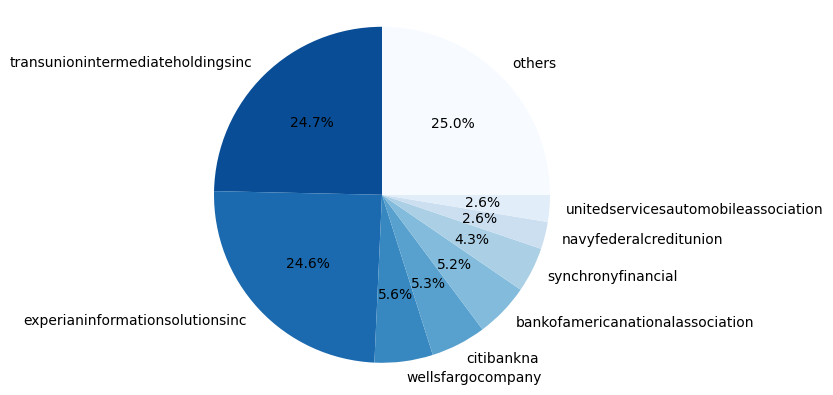

In [163]:
# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(company_data_perc['percentage'], labels=company_data_perc['Company'], autopct='%1.1f%%', startangle=90)


wedges = wedges[::-1]
texts = texts[::-1]
autotexts = autotexts[::-1]

# Add gradients of blue to each wedge
for i, wedge in enumerate(wedges):
    wedge.set_facecolor(plt.cm.Blues(i / len(wedges)))

# Set aspect ratio to be equal
ax.axis('equal')

# Show the plot
plt.show()

## Only 8 out of the 800 unique companies make up for 75% of the complaints
with the top 2 accounting for 50% of all the complaints. These 2 are:
transunionintermediateholdingsinc and experianinformationsolutionsinc

and big names like wellsfargocompany, citibankna and bankofamericanationalassociation making it in the top 5.

In [84]:
df_value_counts_pr = df2['Company public response'].value_counts()
df_value_counts_pr

Company public response
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            48855
Company believes it acted appropriately as authorized by contract or law                                                    5602
Company believes the complaint is the result of a misunderstanding                                                           301
Company believes the complaint provided an opportunity to answer consumer's questions                                        260
Company disputes the facts presented in the complaint                                                                        259
Company believes complaint represents an opportunity for improvement to better serve consumers                               219
Company believes complaint caused principally by actions of third party outside the control or direction of the company      219
Company believes complaint is the result of an isolated error            

In [167]:
df2.drop(columns=['Date sent to company'], inplace=True)

In [168]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55924 entries, 42 to 5081162
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 55924 non-null  datetime64[ns]
 1   Product                       55924 non-null  object        
 2   Sub-product                   55924 non-null  object        
 3   Issue                         55924 non-null  object        
 4   Sub-issue                     55924 non-null  object        
 5   Consumer complaint narrative  55924 non-null  object        
 6   Company public response       55924 non-null  object        
 7   Company                       55924 non-null  object        
 8   State                         55924 non-null  object        
 9   ZIP code                      55924 non-null  object        
 10  Tags                          55924 non-null  object        
 11  Consumer consent provided?    

In [169]:
df2.drop(columns=['Tags', 'ZIP code'], inplace=True)

In [170]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55924 entries, 42 to 5081162
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 55924 non-null  datetime64[ns]
 1   Product                       55924 non-null  object        
 2   Sub-product                   55924 non-null  object        
 3   Issue                         55924 non-null  object        
 4   Sub-issue                     55924 non-null  object        
 5   Consumer complaint narrative  55924 non-null  object        
 6   Company public response       55924 non-null  object        
 7   Company                       55924 non-null  object        
 8   State                         55924 non-null  object        
 9   Consumer consent provided?    55924 non-null  object        
 10  Company response to consumer  55924 non-null  object        
 11  Timely response?              

In [171]:
df2['Product'].unique()

array(['Credit card or prepaid card', 'Credit reporting',
       'Checking or savings account', 'Mortgage', 'Debt collection',
       'Loan'], dtype=object)

In [175]:
df2['Company'].unique()

array(['usbancorp', 'transunionintermediateholdingsinc', 'citibankna',
       'experianinformationsolutionsinc', 'wellsfargocompany',
       'selectportfolioservicinginc', 'bmoharrisbanknationalassociation',
       'mrcoopergroupinc', 'bankofamericanationalassociation',
       'santanderholdingsusainc', 'mtbankcorporation', 'loancarellc',
       'springequityllc', 'amshercollectionservicesinc', 'icsysteminc',
       'synchronyfinancial', 'januarytechnologiesinc',
       'prospermarketplaceinc', 'atlanticusservicescorporation',
       'unitedservicesautomobileassociation', 'freedommortgagecompany',
       'newyorkcommunitybancorpinc', 'truistfinancialcorporation',
       'allyfinancialinc', 'shellpointpartnersllc',
       'barclaysbankdelaware', 'navyfederalcreditunion',
       'valorintelligentprocessingllc', 'westlakeservicesllc',
       'ccsfinancialservicesinc', 'collectionsacquisitioncompanyinc',
       'armyandairforceexchangeservice', 'brokersolutionsinc',
       'paramountgrhold

In [176]:
df2['Sub-product'].unique()

array(['General-purpose credit card or charge card', 'Credit reporting',
       'Checking account', 'Conventional home mortgage', 'FHA mortgage',
       'Other banking product or service',
       'Home equity loan or line of credit (HELOC)', 'Other debt',
       'I do not know', 'Telecommunications debt', 'VA mortgage',
       'Store credit card', 'CD (Certificate of Deposit)', 'Loan',
       'Credit card debt', 'Lease', 'General-purpose prepaid card',
       'Savings account', 'Federal student loan debt',
       'Federal student loan servicing', 'Other personal consumer report',
       'Government benefit card', 'Medical debt', 'Mortgage debt',
       'Auto debt', 'Rental debt', 'Manufactured home loan',
       'Installment loan', 'Private student loan', 'USDA mortgage',
       'Gift card', 'Private student loan debt', 'Payday loan debt',
       'Other type of mortgage', 'Reverse mortgage',
       'Personal line of credit', 'Payroll card', 'Payday loan',
       'Student prepaid card']

In [178]:
df2['Sub-issue'].unique()

array(["Credit card company isn't resolving a dispute about a purchase on your statement",
       'Account information incorrect',
       'Information belongs to someone else',
       'Their investigation did not fix an error on your report',
       'Money was taken from your account on the wrong day or for the wrong amount',
       'Escrow, taxes, or insurance', 'Charged too much interest',
       'Card was charged for something you did not purchase with the card',
       'An existing modification, forbearance plan, short sale, or other loss mitigation relief',
       'Reporting company used your report improperly',
       'Transaction was not authorized',
       'Funds not handled or disbursed as instructed',
       'Public record information inaccurate',
       'Problem making or receiving payments',
       'Trying to communicate with the company to fix an issue related to modification, forbearance, short sale, deed-in-lieu, bankruptcy, or foreclosure',
       'Changes in loan terms

In [182]:
df_value_counts = df2['Timely response?'].value_counts()
df_value_counts

Timely response?
Yes    55472
No       452
Name: count, dtype: int64

In [184]:
y = 55472
n= 452
perc_yes = (y/(y+n))*100
perc_no = 100-perc_yes

In [185]:
print(perc_yes)

99.1917602460482


In [186]:
print(perc_no)

0.8082397539517956


In [206]:
df_value_counts_issue = df2['Issue'].value_counts().reset_index()
# Rename columns
df_value_counts_issue.columns = ['Issue', 'count']

# Cumulative sum
df_value_counts_issue['cumulative_count'] = df_value_counts_issue['count'].cumsum()
# Calculate percentage
total_counts = df_value_counts_issue['count'].sum()
df_value_counts_issue['percentage'] = (df_value_counts_issue['count'] / total_counts) * 100

# Display the new DataFrame
df_value_counts_issue

,Issue,count,cumulative_count,percentage
0,Incorrect information on your report,13710,13710,24.515414
1,Improper use of your report,9472,23182,16.937272
2,Problem with a credit reporting company's inve...,6922,30104,12.377512
3,Managing an account,4201,34305,7.511981
4,Attempts to collect debt not owed,2955,37260,5.283957
5,Problem with a purchase shown on your statement,2472,39732,4.420285
6,Problem with a company's investigation into an...,1318,41050,2.356770
7,Problem with a lender or other company chargin...,976,42026,1.745226
8,Closing an account,948,42974,1.695158
9,Written notification about debt,901,43875,1.611115


In [207]:
df_value_counts_subissue = df2['Sub-issue'].value_counts().reset_index()
# Rename columns
df_value_counts_subissue.columns = ['Sub-issue', 'count']

# Cumulative sum
df_value_counts_subissue['cumulative_count'] = df_value_counts_subissue['count'].cumsum()
# Calculate percentage
total_counts = df_value_counts_subissue['count'].sum()
df_value_counts_subissue['percentage'] = (df_value_counts_subissue['count'] / total_counts) * 100

# Display the new DataFrame
df_value_counts_subissue

,Sub-issue,count,cumulative_count,percentage
0,Reporting company used your report improperly,7021,7021,12.554538
1,Their investigation did not fix an error on yo...,5301,12322,9.478936
2,Information belongs to someone else,4146,16468,7.413633
3,Account information incorrect,3768,20236,6.737715
4,Account status incorrect,3003,23239,5.369788
...,...,...,...,...
197,Issues with financial aid services,1,55920,0.001788
198,Threatened to turn you in to immigration or de...,1,55921,0.001788
199,Did not receive car title,1,55922,0.001788
200,"Cannot graduate, receive diploma, or get trans...",1,55923,0.001788


In [210]:
# Identifying the top issue per product category -> top means the most occuring
top_issues_by_product = df2.groupby('Product')['Issue'].value_counts().groupby(level=0).nlargest(3)


In [211]:
top_issues_by_product

Product                      Product                      Issue                                                                           
Checking or savings account  Checking or savings account  Managing an account                                                                  4201
                                                          Problem with a lender or other company charging your account                          976
                                                          Closing an account                                                                    948
Credit card or prepaid card  Credit card or prepaid card  Problem with a purchase shown on your statement                                      2471
                                                          Other features, terms, or problems                                                    883
                                                          Fees or interest                                               